In [1]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image as ImageIPy
from IPython.display import display
import time

In [2]:
# Part 2
# Q1
""" Returns a box filter of nxn.
Signals error if n is not odd.
"""
def boxfilter(n):
    assert n>0 and n%2==1, "Dimension must be odd"
    return 1/(n*n)*np.ones((n,n))

In [3]:
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [4]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [5]:
boxfilter(4)

AssertionError: Dimension must be odd

In [6]:
# Q2
""" Returns a 1D Gaussian filter of length odd(1.6*sigma).
Requires sigma>0.
"""
def gauss1d(sigma):
    # compute length 
    length = math.ceil(6*sigma)
    if length % 2 == 0:
        length = length + 1
    #print(f"length is {length}")
    
    # initialize filter
    x = np.arange(-1*np.floor(length/2), np.floor(length/2)+1, 1)
    #print(f"x is {x}")
    
    # generate density values
    filter = np.exp(- np.square(x) / (2*np.square(sigma)))
    
    # normalize
    filter = 1.0/(np.sum(filter))*filter
    #print(f"shape of filter is {filter.shape}")
    #print(f"sum of elements is {np.sum(filter)}")
    
    return filter

In [7]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [8]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [9]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [10]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

In [11]:
# Q3
""" Returns a 2D Gaussian filter of width odd(1.6*sigma).
Requires sigma>0.
"""
def gauss2d(sigma):
    # compute the 1D Gaussian filter of SD sigma
    filter1d = gauss1d(sigma)
    
    # convolve two 1D Gaussian filters to get the 2D filter
    filter2d = signal.convolve2d(filter1d[np.newaxis], np.transpose(filter1d[np.newaxis]), mode='full')
    
    #print(f"sum of all elements is {np.sum(filter2d)}")
    return filter2d

In [12]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [13]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

In [14]:
# Q4a
""" Returns the convolution of the given filter with the given 
image array.
Requires both inputs being np.float32 arrays, and the filter
being linear with odd dimensions.
"""
def convolve2d_manual(array, filter):
    # determine padding and pad the image
    dimFilter = filter.shape[0]
    p = int((dimFilter-1)/2)
    imgIn = np.pad(array, ((p, p), (p,p)), 'constant', constant_values=((0.0, 0.0), (0.0, 0.0)))
        
    # rotate filter
    filter = np.rot90(filter, k=2)
    
    # initialize output image
    heightIn = array.shape[0]
    widthIn = array.shape[1]
    imgOut = np.zeros((heightIn, widthIn))
    
    # convolve
    for row in range(0, imgOut.shape[0]):
        for col in range(0, imgOut.shape[1]):
            # select neighborhood in image
            neighbor = imgIn[row:(row+dimFilter),col:(col+dimFilter)]
            # convolve filter with neighborhood
            imgOut[row, col] = np.sum(np.multiply(neighbor, filter))
    return imgOut

In [15]:
# tests for Q4a
array4aTest = np.array([[1, 0, 0, 0, 1],[2, 3, 0, 8, 0], [2, 0, 0, 0, 3],[0, 0, 1, 0, 0]])
filter3x3Box = boxfilter(3)
convolve2d_manual(array4aTest, filter3x3Box)

array([[0.66666667, 0.66666667, 1.22222222, 1.        , 1.        ],
       [0.88888889, 0.88888889, 1.22222222, 1.33333333, 1.33333333],
       [0.77777778, 0.88888889, 1.33333333, 1.33333333, 1.22222222],
       [0.22222222, 0.33333333, 0.11111111, 0.44444444, 0.33333333]])

In [16]:
# Q4b
""" Returns the convolution of the given image with a Gaussian
filter of the given sigma.
Requires both inputs being np.float32 arrays.
"""
def gaussconvolve2d_manual(array, sigma):
    gaussFilter = gauss2d(sigma)
    return convolve2d_manual(array, gaussFilter)

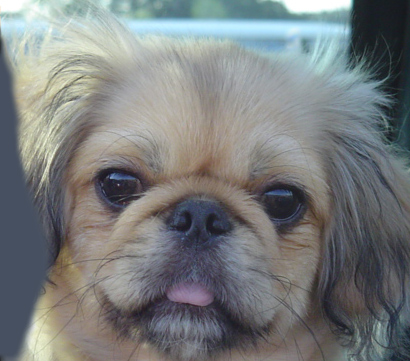

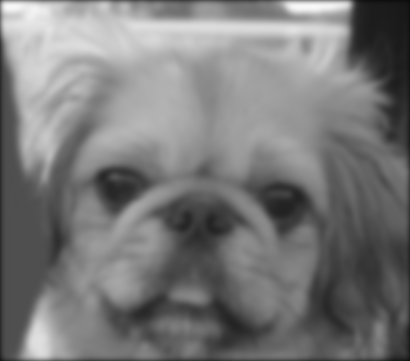

In [17]:
# Q4c, Q4d
# load and show the original image
imgDogOriginal = Image.open('dog.jpg')
display(ImageIPy(filename='dog.jpg'))
# convert original image to greayscale numpy double array
imgDogGrey = imgDogOriginal.convert('L')
imgDogGrey_arrayrep = np.asarray(imgDogGrey, dtype=np.float64)
imgDogGrey_array = imgDogGrey_arrayrep.copy()
# apply Gaussian filter of sigma=3
imgDogGFiltered_array = gaussconvolve2d_manual(imgDogGrey_array, 3)
# save and show the filtered image
imgDogGFiltered = Image.fromarray(imgDogGFiltered_array.astype('uint8'))
imgDogGFiltered.save('dog_4c.png','png')
display(ImageIPy(filename='dog_4c.png'))

In [18]:
# Q5a
""" Returns the convolution of the given image with a Gaussian
filter of the given sigma. Uses scipy for convolution.
Requires both inputs being np.float32 arrays.
"""
def gaussconvolve2d_scipy(array, sigma):
    gaussFilter = gauss2d(sigma)
    return signal.convolve2d(array, gaussFilter, 'same')

we use convolve2d instead of correlated2d, since they produce
different results when the filter is not symmetrical and then
image is not symmetrical.

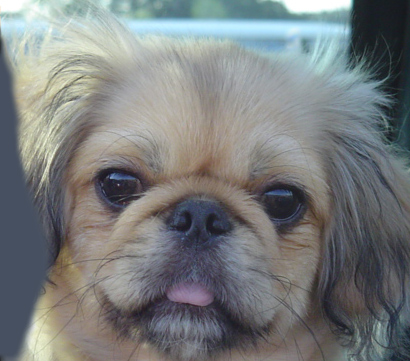

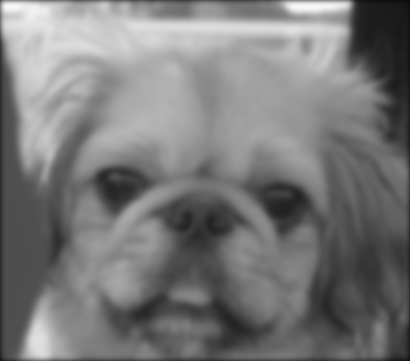

In [19]:
# Q5b
# apply Gaussian filter of sigma=3 using gaussconvolve2d_scipy
imgDogGFilteredScipy_array = gaussconvolve2d_scipy(imgDogGrey_array, 3)
# save and show the filtered image
imgDogGFilteredScipy = Image.fromarray(imgDogGFilteredScipy_array.astype('uint8'))
imgDogGFilteredScipy.save('dog_5c.png','png')

# Q5c
display(ImageIPy(filename='dog.jpg'))
display(ImageIPy(filename='dog_5c.png'))

In [20]:
# Q6
# apply Gaussian filter of sigma=10, manual
timeStart_manual = time.time()
imgDogGFiltered_array = gaussconvolve2d_manual(imgDogGrey_array, 10)
duration_manual = time.time() - timeStart_manual
print(f"manual time is {duration_manual} s")
# apply Gaussian filter of sigma=10, scipy
timeStart_scipy = time.time()
imgDogGFilteredScipy_array = gaussconvolve2d_scipy(imgDogGrey_array, 10)
duration_scipy = time.time() - timeStart_scipy
print(f"scipy time is {duration_scipy} s")

manual time is 3.6896395683288574 s
scipy time is 1.165207862854004 s


- gaussconvlve2d_scipy runs about 3x faster than gaussconvolve2d_manual
- the two functions invoke the same method to generate a 2D Gaussian filter with sigma=10
- so the running time difference is due to signal.convolve2d being faster than convolve2d_manual
- signal.convolve2d being faster could be due to having a faster algorithm to do convolution (e.g.
by utilizing the separability of 2D Gaussian filters) or better utilization of hardware resources
(e.g. by exploiting parallelism in algorithms)

Q7

* Gaussian convolution can be done more efficiently by using the 
following algorithm:
1) Given sigma, create two 1D Gaussian filters, A and B. A has 
dimension (1, m) and B has dimension (m, 1), where m = odd(6*sigma);
2) Convolve A with given image (pad the image in "same" mode with 
zeros);
3) Convolve B with the output from Step 2) (pad the output from 
step 2) in "same" mode with zeros).

* This implementation utilizes separability of Gaussian filters
because for a 2D Gaussian filter $F(X, Y)=F(X)F(Y)$, and in this implementation,
$F(X)$ is assigned to A and $F(Y)$ is assigned to B.

* This implementation is more time-efficient because given an input
image of size $nxn$, convolving with a 2D Gaussian filter takes O($m^2*n^2$)
multiply-and-add operations, whereas with two 1D filters, step 2) takes
O($m*n^2$) operations and step 3) takes O($m*n^2$) operations, so in total
the algorithm takes O($m*n^2$) operations. So convolving with two 1D filters
is asymptotically faster than with one 2D filter.


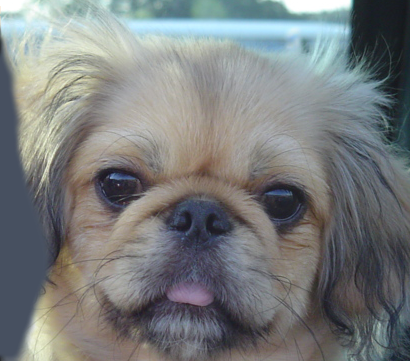

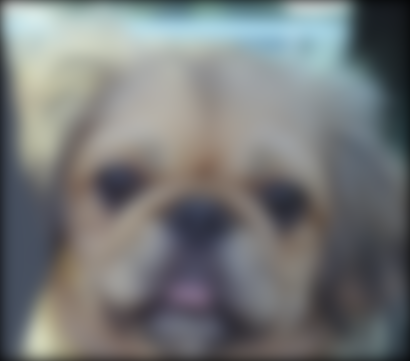

In [21]:
# Part 3
# Q1
sigma = 8.0
# load and show image (original)
img0bOriginal = Image.open('hw1/0b_dog.bmp')
img0bOriginal.save('hw1/0b_dog.png', 'png')
display(ImageIPy(filename='hw1/0b_dog.png'))
# convert original image to numpy array
img0bOriginal_arrayrep = np.asarray(img0bOriginal, dtype=np.float64)
img0bOriginal_array = img0bOriginal_arrayrep.copy()
# initialize output image
img0bGFiltered_array = np.ndarray(img0bOriginal_array.shape)
for i in range(0,3):
    # extract color channel
    img0bOriginal_channel_array = img0bOriginal_array[:,:,i]
    # apply Gaussian filter of sigma to the channel
    img0bGFiltered_channel_array = gaussconvolve2d_scipy(img0bOriginal_channel_array, sigma)
    # copy the filtered channel to the output image
    img0bGFiltered_array[:,:,i] = img0bGFiltered_channel_array
# save and show the filtered image
img0bGFiltered = Image.fromarray(img0bGFiltered_array.astype('uint8'))
img0bGFiltered.save('hw1/0b_dog_filtered.png','png')
display(ImageIPy(filename='hw1/0b_dog_filtered.png'))

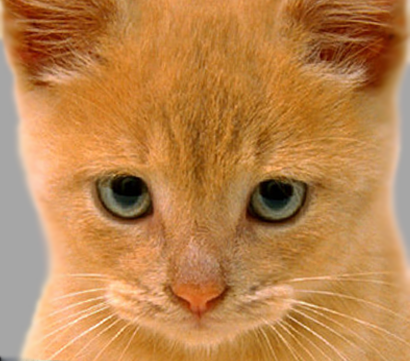

shape of img0aOriginal_array is (361, 410, 3)


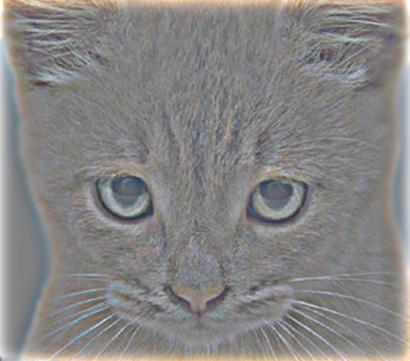

In [22]:
# Q2
# load and show image (original)
img0aOriginal = Image.open('hw1/0a_cat.bmp')
img0aOriginal.save('hw1/0a_cat.png', 'png')
display(ImageIPy(filename='hw1/0a_cat.png'))
# convert original image to numpy array
img0aOriginal_arrayrep = np.asarray(img0aOriginal, dtype=np.float64)
img0aOriginal_array = img0aOriginal_arrayrep.copy()
print(f"shape of img0aOriginal_array is {img0aOriginal_array.shape}")
# initialize output image
img0aGFiltered_array = np.ndarray(img0aOriginal_array.shape)
for i in range(0,3):
    # extract color channel
    img0aOriginal_channel_array = img0aOriginal_array[:,:,i]
    # apply Gaussian filter of sigma to the channel
    img0aGFiltered_channel_array = gaussconvolve2d_scipy(img0aOriginal_channel_array, sigma)
    # copy the filtered channel to the output image
    img0aGFiltered_array[:,:,i] = img0aGFiltered_channel_array
# get high-freq image by subtracting low-freq image from original
img0aHFreq_array = img0aOriginal_array - img0aGFiltered_array
# add 128 and clamp to [0, 255] for visualization
img0aHFreqVis_array = np.clip((img0aHFreq_array + 128.0), 0.0, 255.0)
# save and show the filtered image
img0aHFreq = Image.fromarray(img0aHFreqVis_array.astype('uint8'))
img0aHFreq.save('hw1/0a_cat_filtered.png','png')
display(ImageIPy(filename='hw1/0a_cat_filtered.png'))

Showing image: hw1/0_hybrid_sigma=4.0.png


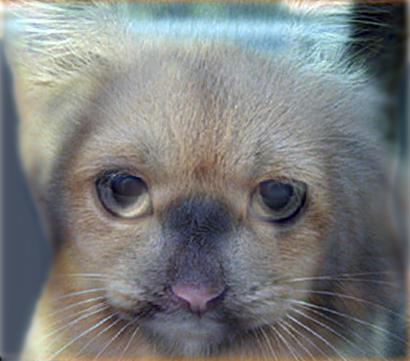

Showing image: hw1/1_hybrid_sigma=4.0.png


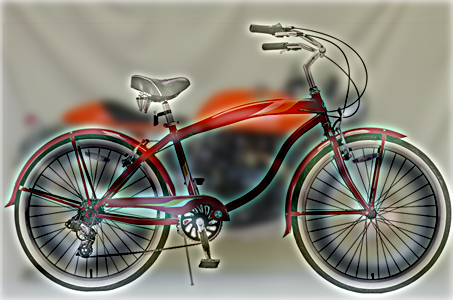

Showing image: hw1/2_hybrid_sigma=4.0.png


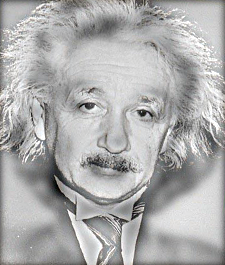

Showing image: hw1/3_hybrid_sigma=4.0.png


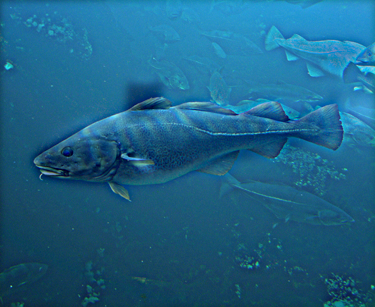

Showing image: hw1/4_hybrid_sigma=4.0.png


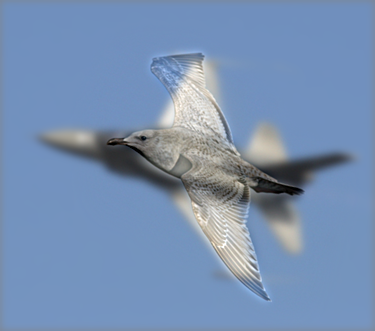

Showing image: hw1/0_hybrid_sigma=8.0.png


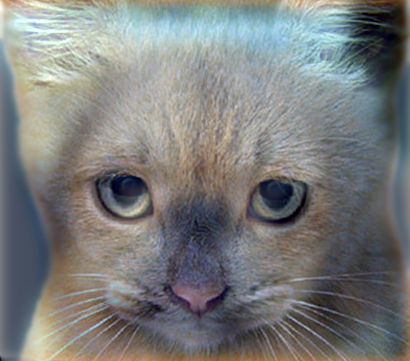

Showing image: hw1/1_hybrid_sigma=8.0.png


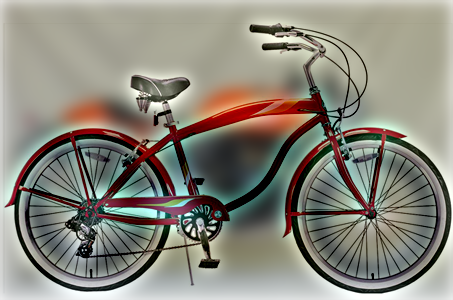

Showing image: hw1/2_hybrid_sigma=8.0.png


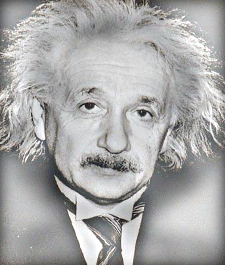

Showing image: hw1/3_hybrid_sigma=8.0.png


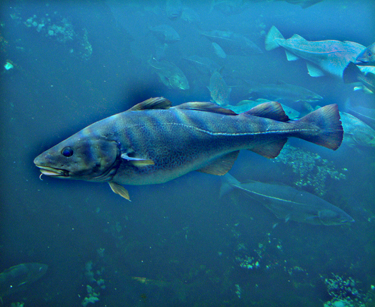

Showing image: hw1/4_hybrid_sigma=8.0.png


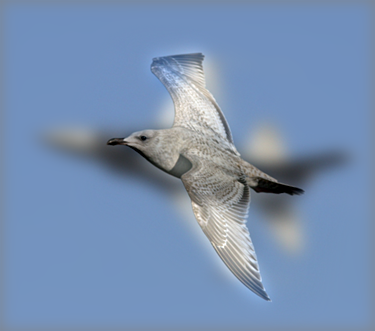

Showing image: hw1/0_hybrid_sigma=12.0.png


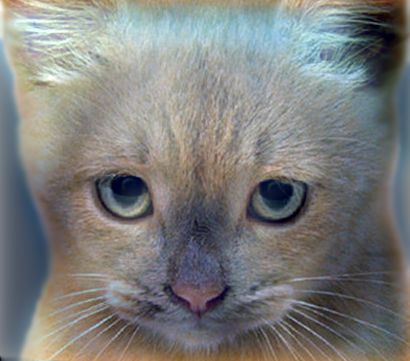

Showing image: hw1/1_hybrid_sigma=12.0.png


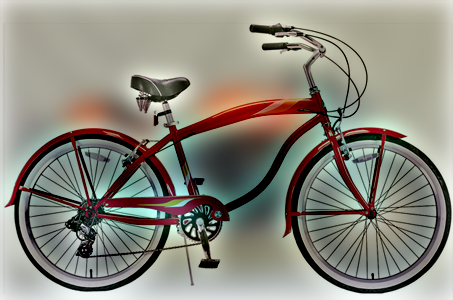

Showing image: hw1/2_hybrid_sigma=12.0.png


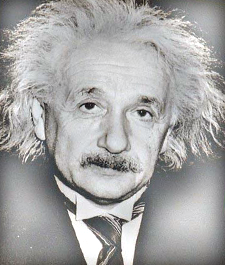

Showing image: hw1/3_hybrid_sigma=12.0.png


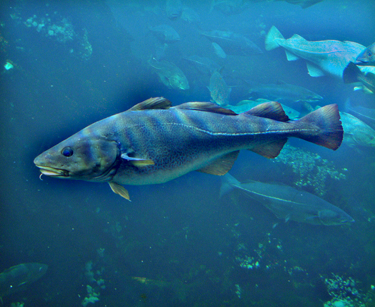

Showing image: hw1/4_hybrid_sigma=12.0.png


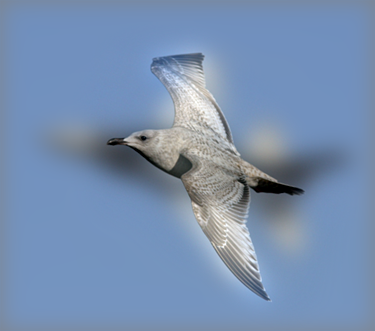

In [23]:
# Q3
""" For the image specified with filepath, returns the original
image and Gaussian-filtered (with sigma) image as numpy arrays.
"""
def createGFilteredImg(filepath, sigma):
    # load image
    imgOriginal = Image.open(filepath)
    # convert original image to numpy array
    imgOriginal_arrayrep = np.asarray(imgOriginal, dtype=np.float64)
    imgOriginal_array = imgOriginal_arrayrep.copy()
    # initialize output image
    imgGFiltered_array = np.ndarray(imgOriginal_array.shape)
    for i in range(0,3):
        # extract color channel
        imgOriginal_channel_array = imgOriginal_array[:,:,i]
        # apply Gaussian filter of sigma to the channel
        imgGFiltered_channel_array = gaussconvolve2d_scipy(imgOriginal_channel_array, sigma)
        # copy the filtered channel to the output image
        imgGFiltered_array[:,:,i] = imgGFiltered_channel_array
    return (imgOriginal_array, imgGFiltered_array)

""" Creates a hybrid image from image a and b with each's path
specified. The hybrid image is the sum of A's low-freq components
and B's high-freq components.
Uses given sigma for Gaussian filtering.
"""
def createHybridImg(filepath_a, filepath_b, filepath_hybrid, sigma):
    # get A and B's low-freq components and B's original image as numpy arrays
    _, imgALFreq_array = createGFilteredImg(filepath_a, sigma)
    imgBOriginal_array, imgBLFreq_array = createGFilteredImg(filepath_b, sigma)
    # get B's high-freq components
    imgBHFreq_array = imgBOriginal_array - imgBLFreq_array
    imgHybrid_array = np.clip((imgALFreq_array + imgBHFreq_array), 0.0, 255.0)
    # save and show the hybrid image
    imgHybrid = Image.fromarray(imgHybrid_array.astype('uint8'))
    imgHybrid.save(filepath_hybrid, 'png')
    print(f"Showing image: {filepath_hybrid}")
    display(ImageIPy(filename=filepath_hybrid))
    return

# creates hybrids for test pairs
for sig in [4.0, 8.0, 12.0]:
    createHybridImg('hw1/0b_dog.bmp', 'hw1/0a_cat.bmp', f'hw1/0_hybrid_sigma={sig}.png', sig)
    createHybridImg('hw1/1b_motorcycle.bmp', 'hw1/1a_bicycle.bmp', f'hw1/1_hybrid_sigma={sig}.png', sig)
    createHybridImg('hw1/2b_marilyn.bmp', 'hw1/2a_einstein.bmp', f'hw1/2_hybrid_sigma={sig}.png', sig)
    createHybridImg('hw1/3b_submarine.bmp', 'hw1/3a_fish.bmp', f'hw1/3_hybrid_sigma={sig}.png', sig)
    createHybridImg('hw1/4b_plane.bmp', 'hw1/4a_bird.bmp', f'hw1/4_hybrid_sigma={sig}.png', sig)

Showing Gaussian filter + Gaussian noise:


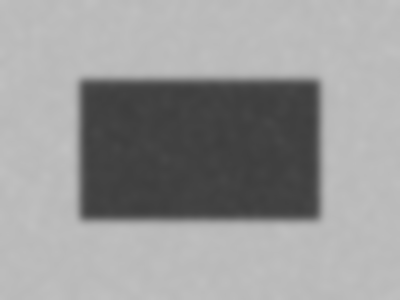

Showing Gaussian filter + Speckle noise:


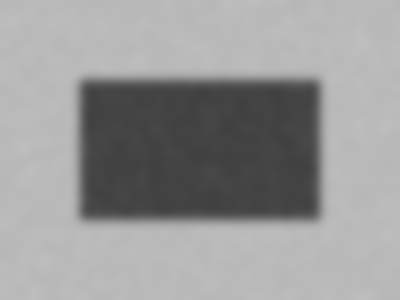

Showing Bilateral filter + Gaussian noise:


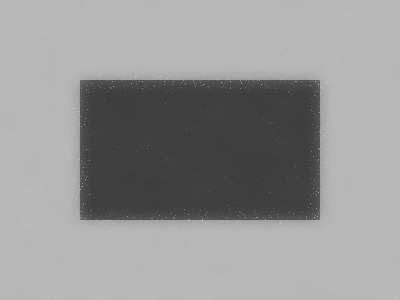

Showing Bilateral filter + Speckle noise:


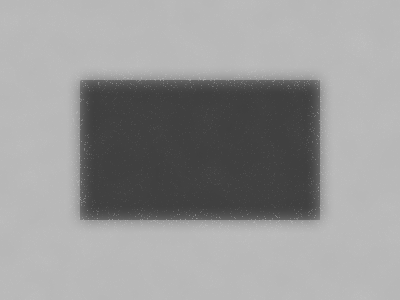

Showing Median filter + Gaussian noise:


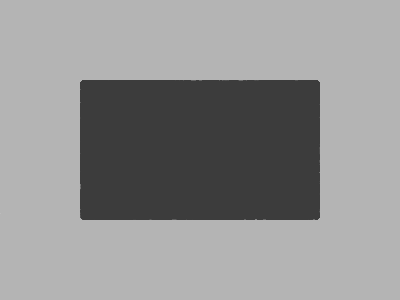

Showing Median filter + Speckle noise:


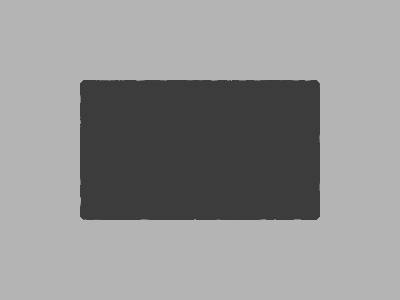

In [25]:
# Part 4
# Q1
# load Gaussian noise image
imgGNoise_array = cv2.imread('box_gauss.png')
# load Speckle noise image
imgSNoise_array = cv2.imread('box_speckle.png')

# Gaussian filter + Gaussian noise
sigma = 4.0 # set Gaussian filter sigma
imgGNoiseGFiltered_array = cv2.GaussianBlur(src=imgGNoise_array, ksize=(0, 0), sigmaX=sigma, sigmaY=0, borderType=cv2.BORDER_DEFAULT) #sigmaY takes sigmaX
imgGNoiseGFiltered = Image.fromarray(imgGNoiseGFiltered_array.astype('uint8'))
imgGNoiseGFiltered.save('box_gauss_GFiltered.png','png')
print("Showing Gaussian filter + Gaussian noise:")
display(ImageIPy(filename='box_gauss_GFiltered.png'))

# Gaussian filter + Speckle noise
sigma = 5.0 # set Gaussian filter sigma
imgSNoiseGFiltered_array = cv2.GaussianBlur(src=imgSNoise_array, ksize=(0, 0), sigmaX=sigma, sigmaY=0, borderType=cv2.BORDER_DEFAULT) #sigmaY takes sigmaX
imgSNoiseGFiltered = Image.fromarray(imgSNoiseGFiltered_array.astype('uint8'))
imgSNoiseGFiltered.save('box_speckle_GFiltered.png','png')
print("Showing Gaussian filter + Speckle noise:")
display(ImageIPy(filename='box_speckle_GFiltered.png'))

# Bilateral filter + Gaussian noise
sigmaColor = 220.0
sigmaSpace = 10.0
imgGNoiseBFiltered_array = cv2.bilateralFilter(src=imgGNoise_array, d=0, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace, borderType=cv2.BORDER_DEFAULT)
imgGNoiseBFiltered = Image.fromarray(imgGNoiseBFiltered_array.astype('uint8'))
imgGNoiseBFiltered.save('box_gauss_BFiltered.png','png')
print("Showing Bilateral filter + Gaussian noise:")
display(ImageIPy(filename='box_gauss_BFiltered.png'))

# Bilateral filter + Speckle noise
sigmaColor = 300.0
sigmaSpace = 10.0
imgSNoiseBFiltered_array = cv2.bilateralFilter(src=imgSNoise_array, d=0, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace, borderType=cv2.BORDER_DEFAULT)
imgSNoiseBFiltered = Image.fromarray(imgSNoiseBFiltered_array.astype('uint8'))
imgSNoiseBFiltered.save('box_speckle_BFiltered.png','png')
print("Showing Bilateral filter + Speckle noise:")
display(ImageIPy(filename='box_speckle_BFiltered.png'))

# Median filter + Gaussian noise
size = 5 # must be odd
imgGNoiseMFiltered_array = cv2.medianBlur(imgGNoise_array, size)
imgGNoiseMFiltered = Image.fromarray(imgGNoiseMFiltered_array.astype('uint8'))
imgGNoiseMFiltered.save('box_gauss_MFiltered.png','png')
print("Showing Median filter + Gaussian noise:")
display(ImageIPy(filename='box_gauss_MFiltered.png'))

# Median filter + Speckle noise
size = 7 # must be odd
imgSNoiseMFiltered_array = cv2.medianBlur(imgSNoise_array, size)
imgSNoiseMFiltered = Image.fromarray(imgSNoiseMFiltered_array.astype('uint8'))
imgSNoiseMFiltered.save('box_speckle_MFiltered.png','png')
print("Showing Median filter + Speckle noise:")
display(ImageIPy(filename='box_speckle_MFiltered.png'))

Showing Gaussian noise + Gaussian filter:


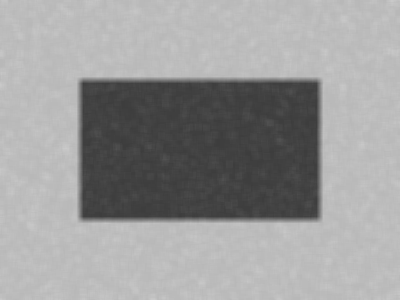

Showing Gaussian noise + Bilateral filter:


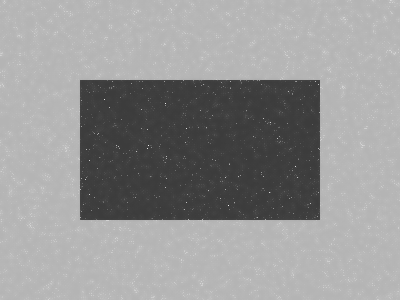

Showing Gaussian noise + Median filter:


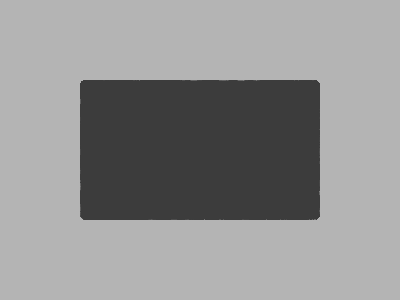

Showing Speckle noise + Gaussian filter:


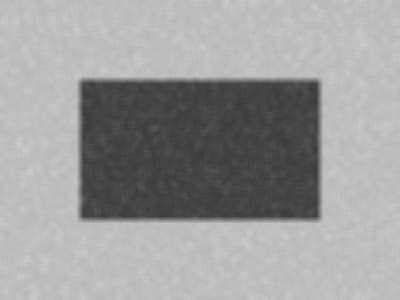

Showing Speckle noise + Bilateral filter:


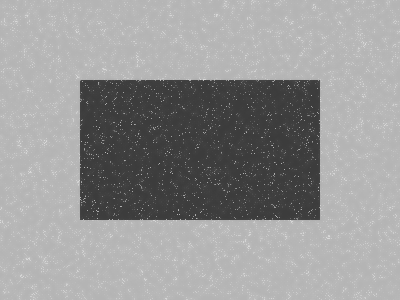

Showing Speckle noise + Median filter:


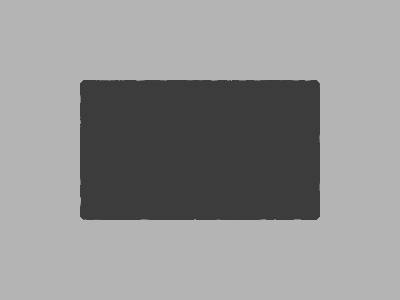

In [26]:
# Q2
""" Apply given filter type to source image, with specs
from Assignment 1 doc, Part 4 Q2. Save and show filtered
image.
Requires noise_type being either 'g' or 's';
Requires filter_type being one of 'g', 'b', 'm'.
"""
def filter_image(imgSrc_array, noise_type, filter_type):
    # apply filter
    imgFiltered_array = None
    if filter_type is 'g':
        imgFiltered_array = cv2.GaussianBlur(imgSrc_array, ksize=(7, 7), sigmaX=50)
    elif filter_type is 'b':
        imgFiltered_array = cv2.bilateralFilter(imgSrc_array, 7, sigmaColor=150, sigmaSpace=150)
    elif filter_type is 'm':
        imgFiltered_array = cv2.medianBlur(imgSrc_array, 7)
    
    # save image
    imgFiltered = Image.fromarray(imgFiltered_array.astype('uint8'))
    imgFileName = f"{noise_type}noise_{filter_type}filter.png"
    imgFiltered.save(imgFileName, 'png')
    
    # show image
    noise_type_string = ''
    filter_type_string = ''
    if noise_type is 'g':
        noise_type_string = 'Gaussian'
    elif noise_type is 's':
        noise_type_string = 'Speckle'
    if filter_type is 'g':
        filter_type_string = 'Gaussian'
    elif filter_type is 'b':
        filter_type_string = 'Bilateral'
    elif filter_type is 'm':
        filter_type_string = 'Median'
    print(f"Showing {noise_type_string} noise + {filter_type_string} filter:")
    display(ImageIPy(filename=imgFileName))


# Gaussian noise
filter_image(imgGNoise_array, 'g', 'g')
filter_image(imgGNoise_array, 'g', 'b')
filter_image(imgGNoise_array, 'g', 'm')
# Speckle noise
filter_image(imgSNoise_array, 's', 'g')
filter_image(imgSNoise_array, 's', 'b')
filter_image(imgSNoise_array, 's', 'm')

- Gaussian filters. Pros: time-efficient, since it is separable and thus can convolve in O($m*n^2$) time. Cons: 1) does not preserve edge sharpness; 2) denoising effect is not apparent with small sigma and small kernel sizes, since noise pixels have large spatial weights during convolution; 3) large sigma and large kernel sizes blurr images, in addition to denoising them.
- Bilateral filters. Pros: 1) preserves edge sharpness; Cons: 1) not as time efficient as Gaussian filters, since it is not separable; 2) white noise pixels in dark regions can be mistaken as edges due to their large difference from dark pixels, hence get preserved; 3) denoising effect is not apparent with small sigma and small kernel sizes, since noise pixels have large spatial weights during convolution; 4) large spatial sigma and large kernel sizes blurr images, in addition to denoising them.
- Median filters. Pros: 1) the filter can easily "weed out" noise pixels since it takes the median value in each neighborhood, and statistically speaking, the color values of noise pixels do not fall in the range of non-noise pixels; 2) can preserve edge sharpness, since at neighborhoods near edges, the filter yields a value on either side; 3) on average can be fast, since with an efficient sorting algorithm can achieve O($mlog(m)n^2$) running time; Cons: 1) not as time-efficient as Gaussian filters, and in worst case can have O($m^2*n^2$) running time.